# Assignment 4

### Samuel Sheehy (Student ID 18143565)

### Techniques of High Performance Computing (PHAS0102)

### MSc Scientific Computing, University College London, 2019-2020

**This Jupyter Notebook is submitted as completion of the 4th Assignment for the UCL course cited above.**

## Setup

In [202]:
import numpy as np
from scipy.sparse import coo_matrix
import matplotlib.pyplot as plt
from math import ceil

In [119]:
# Discretise

# Numerical Scheme

# Check results

* Finite difference method:
$$
u_h(t, x, y) = u_h(t - \tau, x, y) -  \frac{\tau}{h^2} \left[ 4 u_h(t - \tau, x, y)
- u_h(t - \tau, x - h, y) - u_h(t - \tau, x + h, y) - u_h(t - \tau, x, y - h) - u_h(t - \tau, x, y + h) \right]
$$

* Rearranged:
$$

$$

In [478]:
# Explicit Method

# Build matrix A
def is_bc(i, j, M):
    """
    Check if the given coordinates correspond to a boundary.
    """
    if i == 0 or i == M - 1:
        return True
    elif j == 0 or j == M - 1:
        return True
    else:
        return False
    
def build_explicit_system(tau, h0, boundary_f):
    """
    Build a matrix which applies an explicit method to solve the problem.
    """
    data = []
    rows = []
    cols = []
    
    M = ceil(2/h0)
    if M % 2 == 0:
        M += 1
    h = 1/M
    print(h)
    
    print(h, h0, tau)
    print(f'M:{M}')
    
    Mop = (M-2)**2
    
    
    b = np.zeros(Mop)
    
    def add(val, row, colshift):
        """
        Add coefficient to operator.
        """
        data.append(val)
        rows.append(row)
        if row+colshift < 0:
            raise Exception(f'Negative col index {row}: {colshift}')
        cols.append(row+colshift)
    
    k = 0
    for row_idx in range(1, M-1):
        for col_idx in range(1, M-1):
            # k = M * (row_idx - 1) + (col_idx - 1)
            # print(f'k: {k} = {row_idx} + {col_idx}')
            
            # Consider Boundary influences
            if is_bc(row_idx + 1, col_idx, M):
#                 print('top')
                b[k] += 0 #boundary_f((row_idx + 1)/M, col_idx/M)
                
            if is_bc(row_idx - 1, col_idx, M):
#                 print('bottom')
                b[k] += 5*tau/h**2 #boundary_f((row_idx - 1)/M, col_idx/M)
                
            if is_bc(row_idx, col_idx + 1, M):
#                 print('right')
                b[k] += 0 #boundary_f(row_idx, (col_idx + 1)/M)
                
            if is_bc(row_idx, col_idx - 1, M):
#                 print('left')                
                b[k] += 0 #boundary_f(row_idx, (col_idx - 1)/M)
            
            # Matrix
            if is_bc(row_idx, col_idx, M):
                raise Exception('Adding a bc to matrix')
            
            # center
            add(1 - 4*tau/h**2, k, 0)
#             add(4, k, 0)
            
            # left
            if col_idx >= 2:
                add(tau/h**2, k, -1)
#                 add(-1, k, -1)
            
            # right
            if col_idx < M - 2:
                add(tau/h**2, k, 1)
#                 add(-1, k, 1)
            
            # top
            if row_idx < M - 2:
                add(tau/h**2, k, M - 2)
#                 add(-1, k, M-2)
            
            # bottom
            if row_idx >= 2:
                add(tau/h**2, k, -(M - 2))
#                 add(-1, k, -M+2)
            k += 1
            
    # Check for negative column indexes
    if any([x<0 for x in cols]):
        print(cols)
        raise Exception('Negative column index')

    A = coo_matrix((data, (rows, cols))).tocsc()
    
    # Ensure matrix is square
    if A.shape[0] != A.shape[1]:
        print('shape:', A.shape)
        return A, b
        raise Exception(f'Matrix is not square: {A.shape}')
    
    # Ensure it's the expected size
    if A.shape[0] != Mop:
        raise Exception(f'Matrix wrong size:{A.shape[0]}')
                
    return A, b

In [486]:
# Boundaries:
def f(y, x):
    if y == 0: return 5
    else: return 0

h = 1/64
Tf = 0.424
nt = ceil(4*Tf)*ceil(1/(h/2)**2)

tau = Tf/nt

print(f'nt:{nt}\nh:{h}\ntau:{tau}')

A, bounds = build_explicit_system(tau, h, f)

nt:32768
h:0.015625
tau:1.2939453125e-05
0.007751937984496124
0.007751937984496124 0.015625 1.2939453125e-05
M:129


In [489]:
b = np.empty_like(bounds)*0
iters = 0

t = 0

loc = len(b)//2 + 1

vals = []

for i in range(nt):
    t += tau
    b = A @ b + bounds
    vals.append(b[loc])

print(f't:{t}')
M = int(len(b)**0.5) + 2
loc = len(b)//2 + 1
b[loc]

t:0.42400000000035193


1.2492545439804124

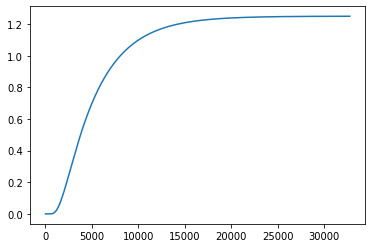

In [490]:
plt.plot(vals)

In [468]:
def show(b, M):
    p = b.reshape(M, M)
    p = np.pad(p, 1)

    # left bc
    p[:, 0] = 0

    # right bc
    p[:, -1] = 0

    # top bc
    p[-1, :] = 0

    # bottom bc
    p[0, :] = 5

    plt.imshow(p, origin='lower')
    plt.colorbar()

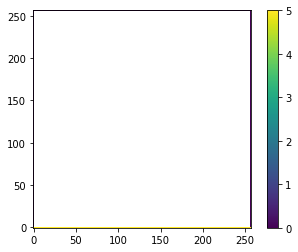

In [469]:

show(b, M-2)

In [414]:
b0

array([5., 5., 5., 0., 0., 0., 0., 0., 0.])